<a href="https://colab.research.google.com/github/Navn33t2k1/Insurance-Forecasting/blob/main/Insurance_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install opendatasets --quiet


In [145]:
import opendatasets as od

In [146]:
od.download('https://www.kaggle.com/datasets/mirichoi0218/insurance')

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [147]:
import pandas as pd

In [148]:
raw_df=pd.read_csv('/content/insurance/insurance.csv')

In [149]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
raw_df.shape

(1338, 7)

In [151]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [152]:
raw_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [153]:
!pip install jovian --quiet

In [154]:
import jovian

In [155]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [156]:
# Exploratry data analysis
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10, 6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [158]:
raw_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [159]:
fig=px.histogram(raw_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [160]:
fig=px.histogram(raw_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['red'],
                 title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [161]:
fig=px.histogram(raw_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['green', 'red'],
                 title='Anual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [162]:
# smoker
raw_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [163]:
px.histogram(raw_df, x='smoker', color='sex', title='Smoker')

In [164]:
# Bivariant and multivariant data visualization
# age vs charges
fig=px.scatter(raw_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [165]:
# BMI vs Charges
fig=px.scatter(raw_df,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [166]:
# Children vs Charges
px.violin(raw_df, x='children', y='charges')

In [167]:
# Correlation
raw_df.charges.corr(raw_df.age)

0.2990081933306476

In [168]:
raw_df.charges.corr(raw_df.bmi)

0.19834096883362895

In [169]:
# Converting catogrical columns into numerical columns
smoker_values={'no':0, 'yes':1}
smoker_numeric=raw_df.smoker.map(smoker_values)


In [170]:
smoker_numeric.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [171]:
# correlatio b/w charges and smoker
raw_df.charges.corr(smoker_numeric)

0.787251430498478

In [172]:
# cosidering only numrical columns
num_cols=raw_df.select_dtypes(include=['number'])

In [173]:
num_cols.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


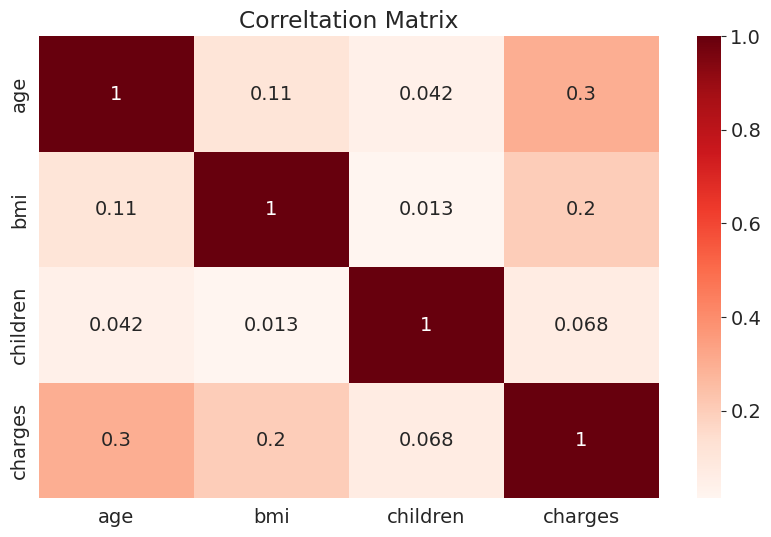

In [174]:
sns.heatmap(num_cols.corr(), cmap='Reds', annot=True)
plt.title('Correltation Matrix');

In [175]:
# Linear regression using simple Feature
non_smoker_df=raw_df[raw_df.smoker=='no']

In [176]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [177]:
non_smoker_df.shape

(1064, 7)

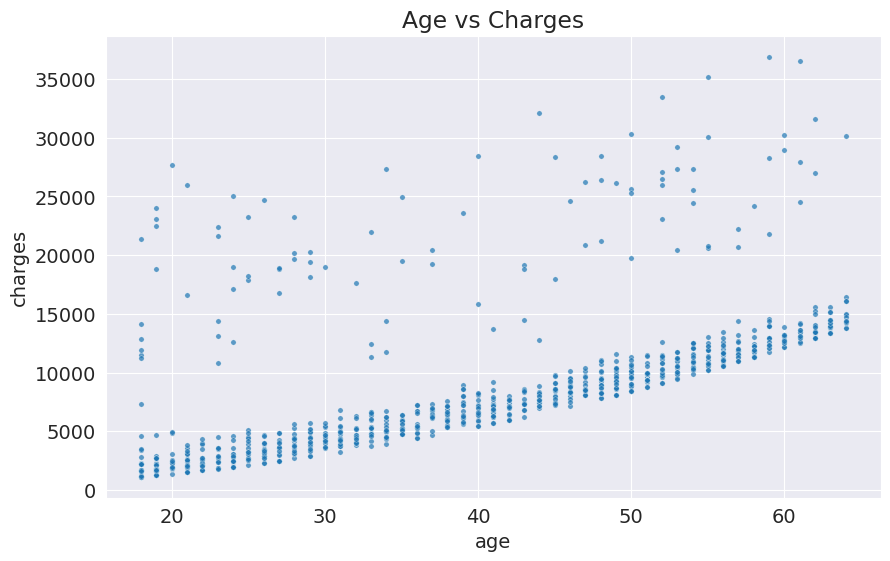

In [178]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [179]:
# Base line model
def estimate_charges(age, w, b):
  return w*age+b

In [180]:
w=50
b=100

In [181]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages, w, b)

In [182]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [183]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

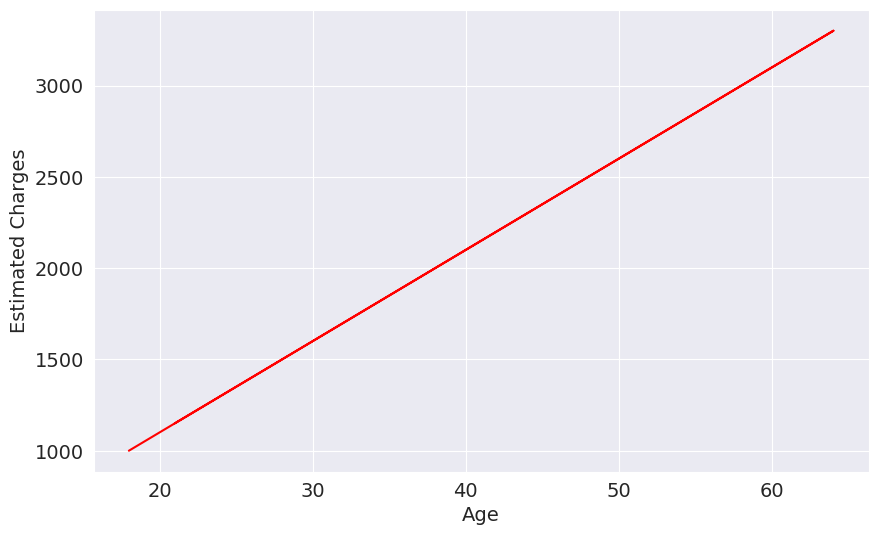

In [184]:
plt.plot(ages, estimated_charges, 'r-');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

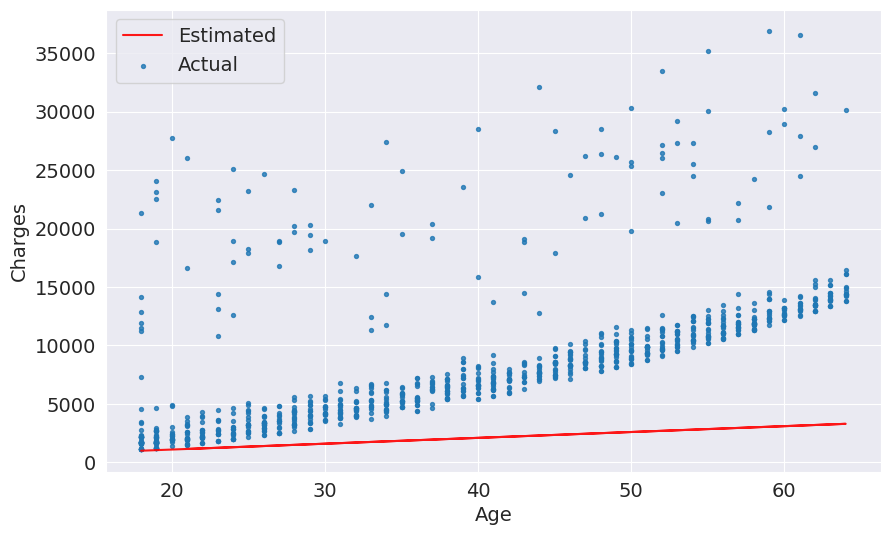

In [185]:
target=non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated', 'Actual'])

In [186]:
# Try Function
def try_parameters(w, b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges

  estimated_charges=estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimeted', 'Actual'])

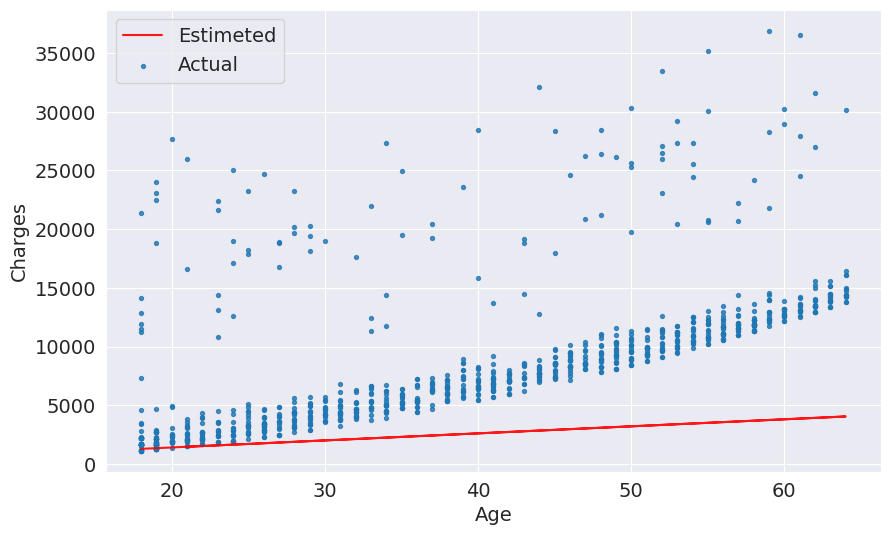

In [187]:
try_parameters(60, 200)

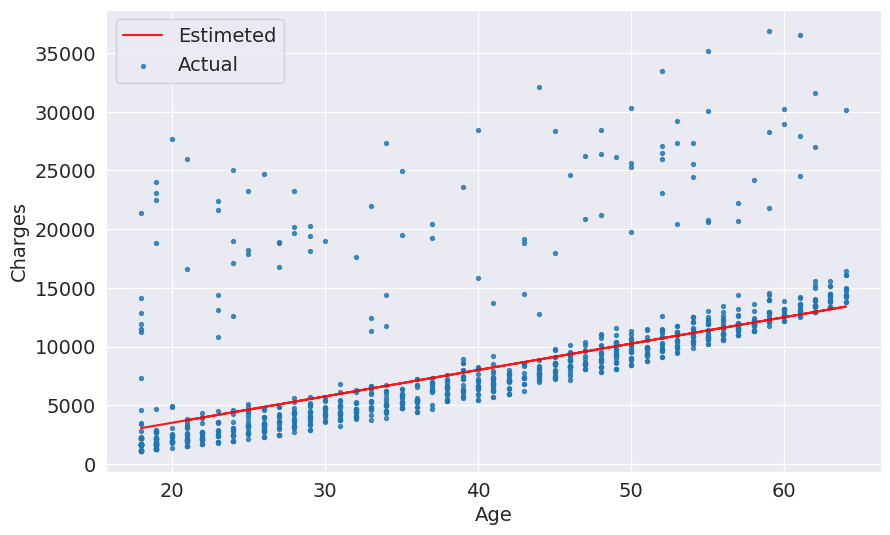

In [188]:
try_parameters(225, -1000)

In [189]:
# Root mean squared error
import numpy as np
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [190]:
w=50
b=100

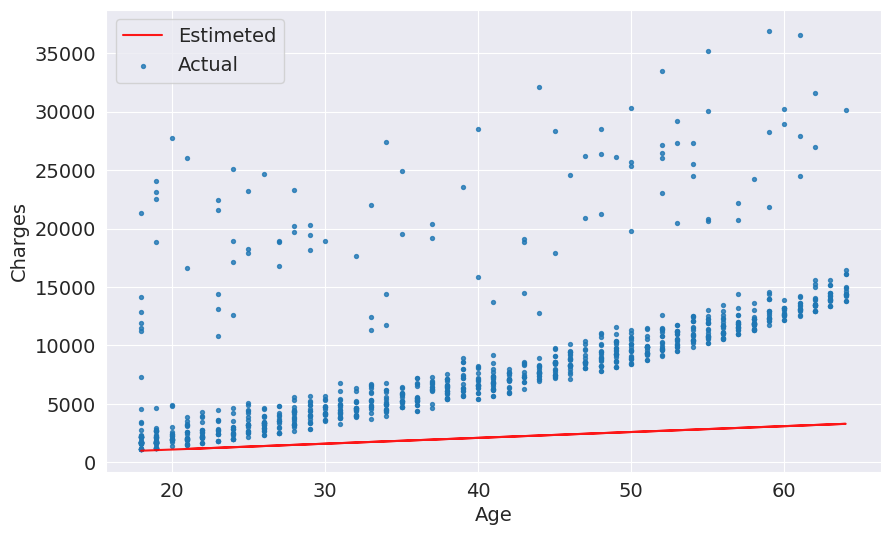

In [191]:
try_parameters(w, b)

In [192]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age, w, b)

In [193]:
rmse(targets, predicted)

8461.949562575493

In [194]:
def try_parameters(w, b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  predictions=estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Predictions', 'Actual']);

  loss=rmse(target, predictions)
  print('RMSE Loss:', loss)




RMSE Loss: 4725.9133994520325


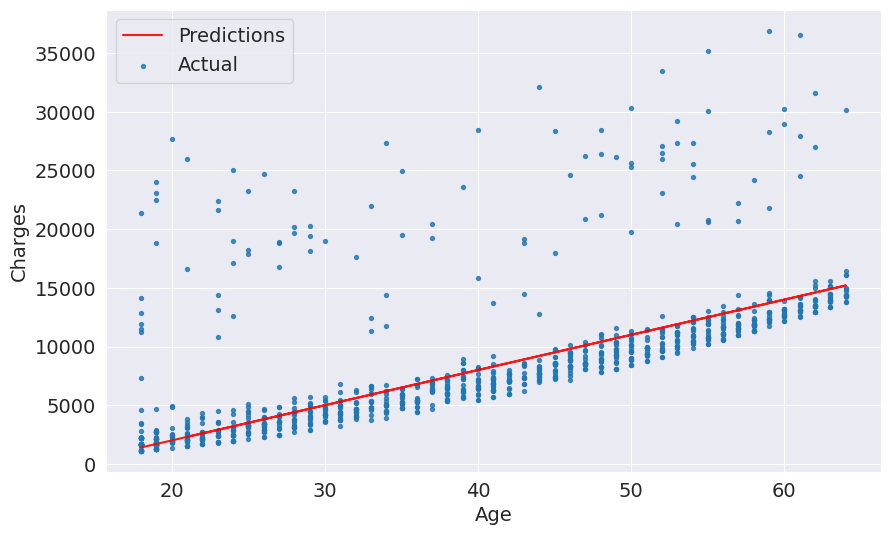

In [195]:
try_parameters(300, -4000)

#  **Linear Regression using Sckit-learn**

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
model=LinearRegression()

In [198]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [199]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('inputs.shpae:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shpae: (1064, 1)
targets.shape: (1064,)


In [200]:
model.fit(inputs, targets)

LinearRegression()

In [201]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [202]:
predictions=model.predict(inputs)

In [203]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [204]:
rmse(targets, predictions)

4662.505766636395

In [205]:
# w
model.coef_

array([267.24891283])

In [206]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss: 4662.505766636395


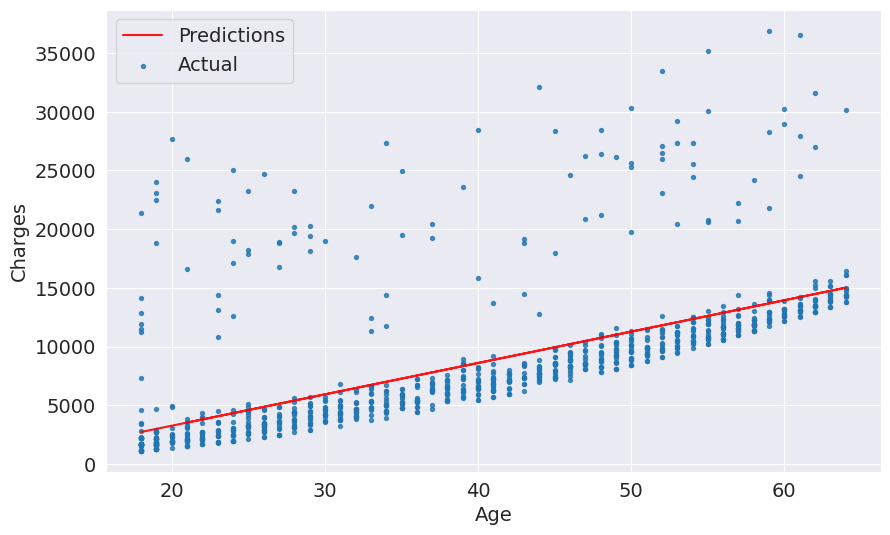

In [207]:
try_parameters(model.coef_, model.intercept_)

# **Analysis on Smokers**

In [208]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [209]:
smoker_df=raw_df[raw_df.smoker=='yes']

In [210]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


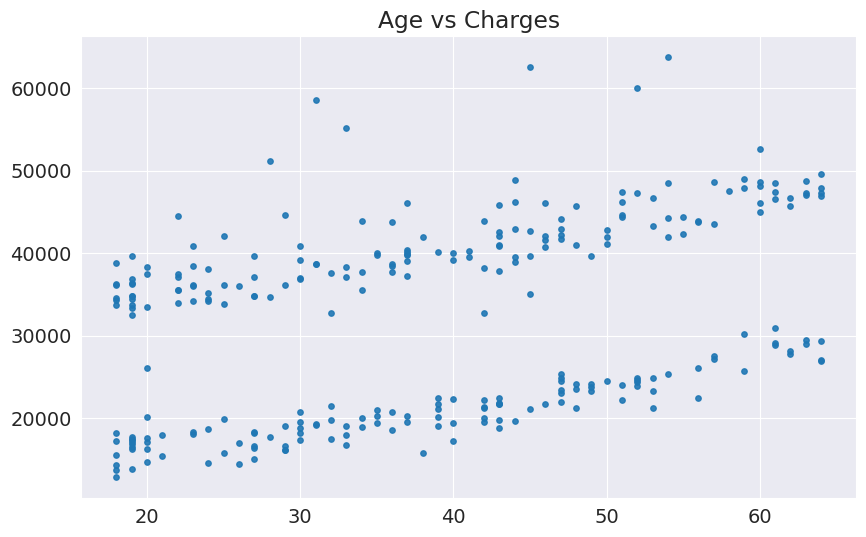

In [211]:
plt.title('Age vs Charges')
plt.scatter(data=smoker_df, x='age', y='charges', s=15, alpha=0.9)

In [212]:
from sklearn.linear_model import SGDRegressor

In [213]:
model=SGDRegressor()

In [214]:
model.fit(inputs, targets)

SGDRegressor()

In [215]:
predict=model.predict(inputs)

In [216]:
rmse(targets, predict)

5123.430632695429

**Linear Regression using multiple features**

In [217]:
# Create inputs  and target
inputs, target=non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 4662.3128354612945


In [218]:
# Correlation b/w Charges and Children
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [219]:
fig=px.strip(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [220]:
# Create inputs  and target
inputs, target=non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 4608.470405038247


In [221]:
# Using whole dataset
# Create inputs  and target
inputs, target=raw_df[['age', 'bmi']], raw_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 11374.110466839007


# **Binary Categories**

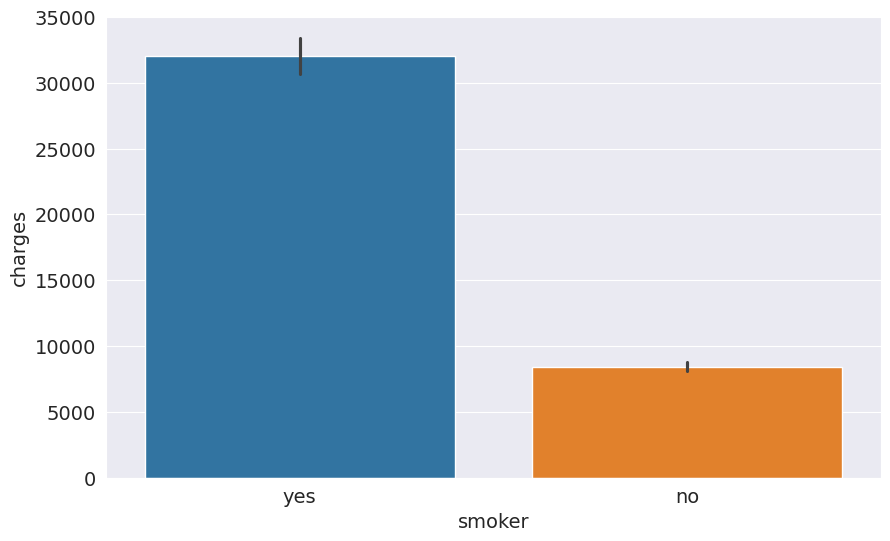

In [222]:
sns.barplot(data=raw_df, x='smoker', y='charges', hue='smoker');

In [223]:
smoker_codes={'no':0, 'yes':1}
raw_df['smoker_codes']=raw_df.smoker.map(smoker_codes)

In [224]:
raw_df.charges.corr(raw_df.smoker_codes)

0.787251430498478

In [225]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [226]:
# Create inputs  and target
inputs, target=raw_df[['age', 'bmi', 'children', 'smoker_codes']], raw_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 6056.439217188081


In [227]:
sex_codes={'male':1, 'female':0}
raw_df['sex_codes']=raw_df.sex.map(sex_codes)

In [228]:
raw_df.charges.corr(raw_df.sex_codes)

0.057292062202025484

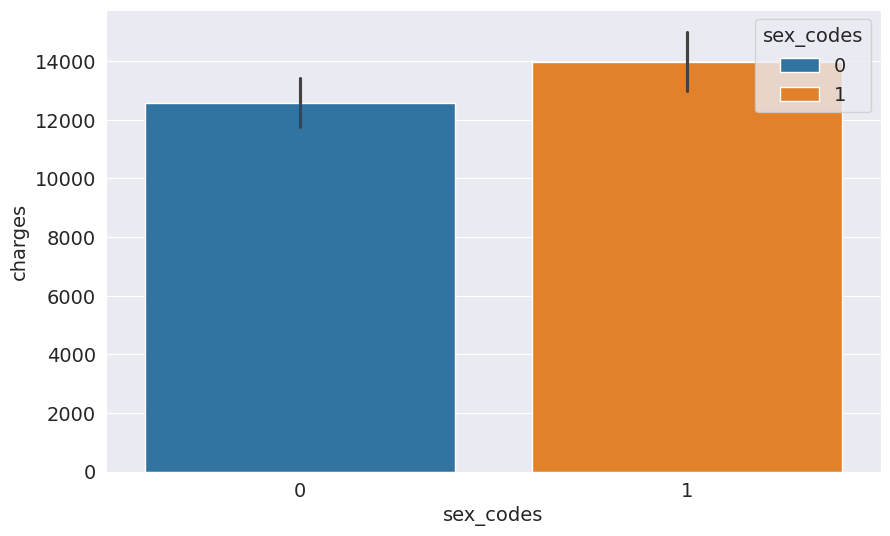

In [229]:
sns.barplot(data=raw_df, x='sex_codes', y='charges', hue='sex_codes');

In [230]:
# Create inputs  and target
inputs, target=raw_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes']], raw_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 6056.100708754546


**One Hot** **Encoding**

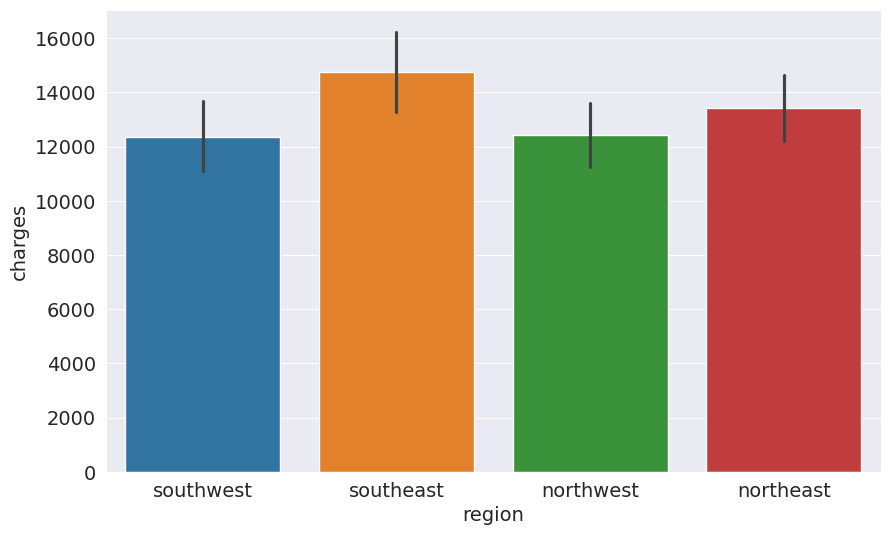

In [231]:
sns.barplot(data=raw_df, x='region', y='charges', hue='region');

In [232]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
model=OneHotEncoder()

In [234]:
model.fit(raw_df[['region']])

OneHotEncoder()

In [235]:
model.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [236]:
model.transform([['northeast'],
                 ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [237]:
one_hot=model.transform(raw_df[['region']]).toarray()

In [238]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [239]:
raw_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [240]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [241]:
# Create inputs  and target
inputs, target=raw_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']], raw_df['charges']

# Create and train the model
model=LinearRegression().fit(inputs, target)

# Generate predictions
prediction=model.predict(inputs)

# Compute loss to evaluate the model
loss=rmse(target, prediction)
print('Loss:', loss)

Loss: 6041.6796511744515


**Model Improvment**

In [242]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [243]:
model.intercept_

-12525.547811195444

In [244]:
inputs_cols=inputs.columns

In [245]:
inputs_cols

Index(['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [273]:
weight_df=pd.DataFrame(
    {'feature':np.append(inputs_cols, 1),
     'weight':np.append(model.coef_, model.intercept_)}
)

In [275]:
model.intercept_

8466.48321541183

In [274]:
weight_df

,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


**Feature scaling**

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
num_cols=['age', 'bmi', 'children']
scaler=StandardScaler()

In [250]:
scaler.fit(raw_df[num_cols])

StandardScaler()

In [251]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [252]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [253]:
scaled_inputs=scaler.transform(raw_df[num_cols])

In [254]:
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [255]:
cat_cols=['smoker_codes', 'sex_codes','northeast',
       'northwest', 'southeast', 'southwest' ]

In [258]:
categorical_data=raw_df[cat_cols].values

In [259]:
inputs=np.concatenate((scaled_inputs, categorical_data), axis=1)

In [261]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [263]:
# Create and train the model
model=LinearRegression().fit(inputs, target)

In [264]:
# Generate predictions
predictions=model.predict(inputs)

In [266]:
# compute loss to evaluate the model
loss=rmse(target, predictions)
loss

6041.6796511744515

In [267]:
weight_df=pd.DataFrame({
    'feature':np.append(num_cols+cat_cols, 1),
    'weight':np.append(model.coef_, model.intercept_)
})

In [270]:
weight_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


 # **How to approch machine learning problem**
**step 1:** Explore the dataset and find the correlations between independent and dependent variable.

**step 2:** Pick the right model, loss functions and optimizer for the problem at hand.

**step 3:** Scale numeric variables and perform One hot encoding with categorical varaible.

**step 4:** Set aside a test set (Using a fractio of the training set).

**step 5:** Train the model.

**step 6:** Make predicton on the test set and compute the loss.
